**PUNTO 1**

archivo de entrada con lo solicitado

In [16]:
import csv
import random

NUM_PACIENTES = 50

# Generar datos aleatorios
def generar_pacientes():
    pacientes = []
    for i in range(NUM_PACIENTES):
        saturacion = random.randint(85, 100)  # Valores aleatorios de saturación
        vacunas = random.randint(0, 3)  # Número de vacunas
        prueba_covid = random.choice(["Positiva", "Negativa"])  # Resultado de prueba
        pacientes.append({"ID": i+1, "Saturacion": saturacion, "Vacunas": vacunas, "Prueba COVID": prueba_covid})
    return pacientes

# Mostrar los datos generados
pacientes = generar_pacientes()

for paciente in pacientes:
    print(paciente)


{'ID': 1, 'Saturacion': 95, 'Vacunas': 2, 'Prueba COVID': 'Negativa'}
{'ID': 2, 'Saturacion': 94, 'Vacunas': 2, 'Prueba COVID': 'Positiva'}
{'ID': 3, 'Saturacion': 91, 'Vacunas': 0, 'Prueba COVID': 'Positiva'}
{'ID': 4, 'Saturacion': 95, 'Vacunas': 3, 'Prueba COVID': 'Negativa'}
{'ID': 5, 'Saturacion': 91, 'Vacunas': 1, 'Prueba COVID': 'Positiva'}
{'ID': 6, 'Saturacion': 90, 'Vacunas': 1, 'Prueba COVID': 'Positiva'}
{'ID': 7, 'Saturacion': 98, 'Vacunas': 2, 'Prueba COVID': 'Negativa'}
{'ID': 8, 'Saturacion': 99, 'Vacunas': 2, 'Prueba COVID': 'Negativa'}
{'ID': 9, 'Saturacion': 91, 'Vacunas': 0, 'Prueba COVID': 'Negativa'}
{'ID': 10, 'Saturacion': 90, 'Vacunas': 0, 'Prueba COVID': 'Negativa'}
{'ID': 11, 'Saturacion': 99, 'Vacunas': 3, 'Prueba COVID': 'Negativa'}
{'ID': 12, 'Saturacion': 89, 'Vacunas': 0, 'Prueba COVID': 'Positiva'}
{'ID': 13, 'Saturacion': 93, 'Vacunas': 3, 'Prueba COVID': 'Negativa'}
{'ID': 14, 'Saturacion': 88, 'Vacunas': 2, 'Prueba COVID': 'Positiva'}
{'ID': 15, 'Sat

Archivo protegido que indica los resultados obtenidos

In [23]:
import csv
import random

NUM_PACIENTES = 50
MAX_CAMILLAS = 10

# Generar datos aleatorios
def generar_pacientes():
    pacientes = []
    for i in range(NUM_PACIENTES):
        saturacion = random.randint(85, 100)
        vacunas = random.randint(0, 3)
        prueba_covid = random.choice(["Positiva", "Negativa"])
        pacientes.append({
            "ID": i + 1,
            "Saturacion": saturacion,
            "Vacunas": vacunas,
            "Prueba COVID": prueba_covid
        })
    return pacientes

# Clasificar pacientes de acuerdo con condiciones
def clasificar_pacientes(pacientes):
    resultados = []
    camillas_ocupadas = 0

    for paciente in pacientes:
        # Evaluación según las condiciones
        if paciente["Saturacion"] < 90:
            destino = "Sala COVID"
        elif paciente["Vacunas"] < 2:
            destino = "Sala COVID"
        elif paciente["Prueba COVID"] == "Positiva":
            destino = "Sala COVID"
        elif camillas_ocupadas < MAX_CAMILLAS:
            destino = "Urgencias"
            camillas_ocupadas += 1
        else:
            destino = "En espera"

        paciente["Destino"] = destino
        resultados.append(paciente)

    return resultados

# Ejecutar
pacientes = generar_pacientes()
pacientes_clasificados = clasificar_pacientes(pacientes)

# Guardar en CSV
with open("resultados.csv", mode='w', newline='', encoding='utf-8') as file:
    columnas = ["ID", "Saturacion", "Vacunas", "Prueba COVID", "Destino"]
    writer = csv.DictWriter(file, fieldnames=columnas)
    writer.writeheader()
    writer.writerows(pacientes_clasificados)

# Mostrar resultados
print("Resultados obtenidos:")
for paciente in pacientes_clasificados:
    print(paciente)

print("Archivo generado: resultados.csv")


Resultados obtenidos:
{'ID': 1, 'Saturacion': 89, 'Vacunas': 3, 'Prueba COVID': 'Negativa', 'Destino': 'Sala COVID'}
{'ID': 2, 'Saturacion': 90, 'Vacunas': 0, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 3, 'Saturacion': 98, 'Vacunas': 2, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 4, 'Saturacion': 94, 'Vacunas': 2, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 5, 'Saturacion': 93, 'Vacunas': 0, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 6, 'Saturacion': 100, 'Vacunas': 0, 'Prueba COVID': 'Negativa', 'Destino': 'Sala COVID'}
{'ID': 7, 'Saturacion': 98, 'Vacunas': 3, 'Prueba COVID': 'Negativa', 'Destino': 'Urgencias'}
{'ID': 8, 'Saturacion': 92, 'Vacunas': 0, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 9, 'Saturacion': 99, 'Vacunas': 1, 'Prueba COVID': 'Positiva', 'Destino': 'Sala COVID'}
{'ID': 10, 'Saturacion': 91, 'Vacunas': 0, 'Prueba COVID': 'Negativa', 'Destino': 'Sala COVID'}
{'ID': 11, 'Saturacion': 90

Ayudas por: Microsoft Copilot

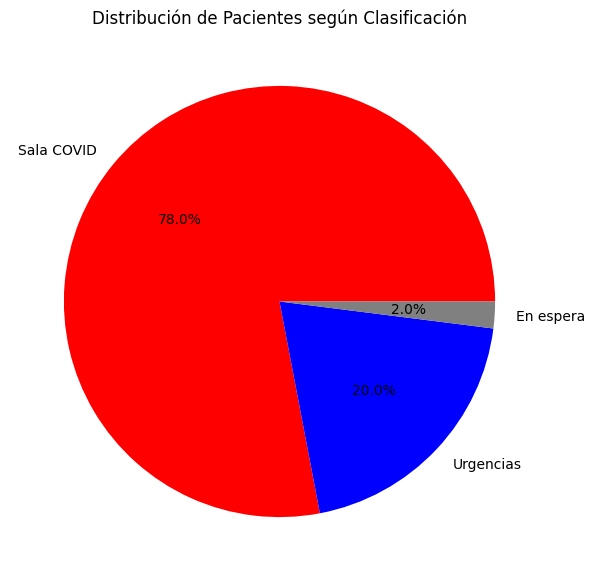

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los resultados desde el archivo CSV
df = pd.read_csv("resultados.csv")

# Contar la cantidad de pacientes en cada categoría
conteo = df["Destino"].value_counts()

# Generar el diagrama de torta
plt.figure(figsize=(7, 7))
plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", colors=["red", "blue", "gray"])
plt.title("Distribución de Pacientes según Clasificación")
plt.show()
